# Example 9: Singularity

Let's construct a dataset which contains singularity $f(x,y)=sin(log(x)+log(y))
 (x>0,y>0)$

In [1]:
from kan import KAN, create_dataset, SYMBOLIC_LIB, add_symbolic
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=20, k=3, seed=0)
f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))
dataset = create_dataset(f, n_var=2, ranges=[0.2,5])

# train the model
model.train(dataset, opt="LBFGS", steps=20);

train loss: 5.00e-03 | test loss: 3.94e-02 | reg: 2.72e+00 : 100%|██| 20/20 [00:11<00:00,  1.78it/s]


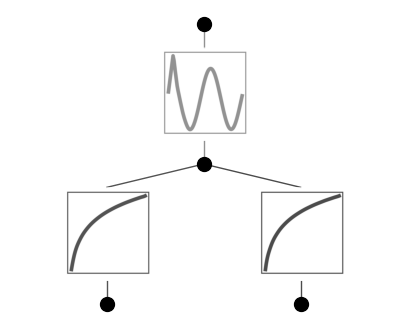

In [2]:
model.plot()

In [3]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

r2 is 0.999988712412588
r2 is 0.9999928603717329
r2 is 0.9968394556850537


tensor(0.9968, grad_fn=<SelectBackward0>)

In [4]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 2.46e-15 | test loss: 6.78e-16 | reg: 2.72e+00 : 100%|██| 20/20 [00:02<00:00,  8.21it/s]


In [5]:
model.symbolic_formula()[0][0]

1.0*sin(2.0*log(2.01*x_1) + 2.0*log(0.62*x_2) + 5.85)

We were lucky -- singularity does not seem to be a problem in this case. But let's instead consider $f(x,y)=\sqrt{x^2+y^2}$. $x=y=0$ is a singularity point.

In [6]:
from kan import KAN, create_dataset, SYMBOLIC_LIB, add_symbolic
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=1)
f = lambda x: torch.sqrt(x[:,[0]]**2+x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 2.08e-01 | test loss: 2.18e-01 | reg: 2.75e+01 : 100%|██| 20/20 [00:38<00:00,  1.92s/it]


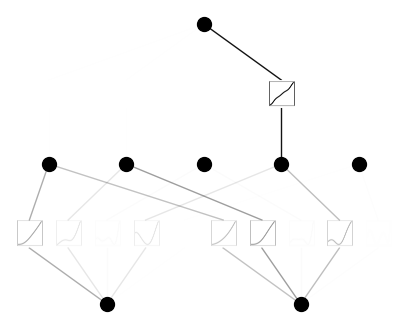

In [7]:
model.plot()

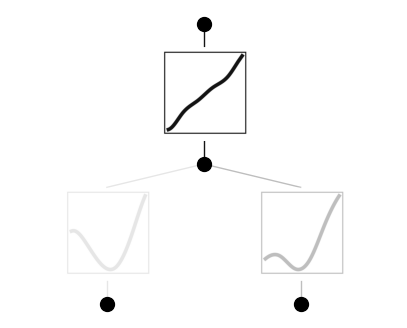

In [8]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [9]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 3.72e-03 | test loss: 3.45e-03 | reg: 3.42e+00 : 100%|██| 20/20 [00:03<00:00,  5.13it/s]


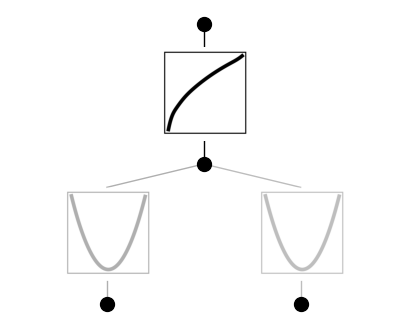

In [10]:
model.plot()

In [11]:
model.auto_symbolic()

fixing (0,0,0) with x^2, r2=0.9999921393183026
fixing (0,1,0) with x^2, r2=0.9999940727994734
fixing (1,0,0) with sqrt, r2=0.9998914314178492


In [12]:
model.symbolic_formula()[0][0]

1.01*sqrt(x_1**2 + 1.0*x_2**2) - 0.e-2

In [13]:
# will give nan, it's a bug that should be resolved later. 
# But happy to see the above already give a formula that is close enough to ground truth
model.train(dataset, opt="LBFGS", steps=20, lr=1e-3, update_grid=False);

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 20/20 [00:03<00:00,  5.70it/s]
